In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Merge industries with the jobs

job_industries_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/job_industries.csv')
industries_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/industries.csv')
# Perform a left join on industry_id
result_df = pd.merge(job_industries_df, industries_df, on='industry_id', how='left')

# Display the result
print(result_df.head(5))
# Group by job_id and aggregate data
result_df = result_df.groupby(['job_id']).agg({
    'industry_id': lambda x: ', '.join(map(str, x)),
    'industry_name': lambda x: ', '.join(map(str, x))
}).reset_index()

# Display the result
job_industries_df=result_df
print(job_industries_df.head(25))

       job_id  industry_id                                      industry_name
0  3378133231           68                                   Higher Education
1  3497509795           96                      IT Services and IT Consulting
2  3690843087           47                                         Accounting
3  3691775263          112  Appliances, Electrical, and Electronics Manufa...
4  3691779379           80                               Advertising Services
        job_id industry_id                                      industry_name
0      3958427          18                Personal Care Product Manufacturing
1     85008768          42                                          Insurance
2    102339515          91                                  Consumer Services
3    108965123          19                         Retail Apparel and Fashion
4    133114754          92                               Truck Transportation
5    133196985         104                            Staffing a

In [3]:
#Merge skills with the job
job_skills_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/job_skills.csv')
skills_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/skills.csv')
# Perform a left join on industry_id
result_df = pd.merge(job_skills_df, skills_df, on='skill_abr', how='left')

# Display the result
print(result_df.head(5))
# Group by job_id and aggregate data
result_df = result_df.groupby(['job_id']).agg({
    'skill_abr': lambda x: ', '.join(map(str, x)),
    'skill_name': lambda x: ', '.join(map(str, x))
}).reset_index()

# Display the result
job_skills_df=result_df
print(job_skills_df.head(25))

       job_id skill_abr           skill_name
0  3690843087      ACCT  Accounting/Auditing
1  3690843087       FIN              Finance
2  3691763971      MGMT           Management
3  3691763971      MNFC        Manufacturing
4  3691775263      MGMT           Management
        job_id      skill_abr                                    skill_name
0      3958427  DSGN, ART, IT  Design, Art/Creative, Information Technology
1     85008768       SALE, BD                   Sales, Business Development
2    102339515       BD, SALE                   Business Development, Sales
3    108965123            ADM                                Administrative
4    133114754       SALE, BD                   Sales, Business Development
5    133196985      ACCT, FIN                  Accounting/Auditing, Finance
6    218881389      ACCT, FIN                  Accounting/Auditing, Finance
7    529257371  DSGN, ART, IT  Design, Art/Creative, Information Technology
8    903408693            ADM                 

In [4]:
job_posting_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/job_postings.csv')
companies_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/companies.csv')
employee_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/employee_counts.csv')

In [5]:
columns_to_drop=['max_salary','med_salary','min_salary','pay_period','original_listed_time','views','expiry','closed_time','listed_time','work_type','currency','compensation_type','scraped']
job_posting_df=job_posting_df.drop(columns=columns_to_drop)

In [6]:
companies_df=pd.read_csv('/Users/kavyavempati/Desktop/Projects/companies.csv',usecols=['company_id','name','url'])
# Perform a left join on CustomerID
job_posting_df = pd.merge(job_posting_df, companies_df, on='company_id', how='left')

# Display the result
print(job_posting_df.head(2))

       job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   

                                         description formatted_work_type  \
0  Overview\n\nHearingLife is a national hearing ...           Full-time   
1  Metalcraft of Mayville\nMetalcraft of Mayville...           Full-time   

           location  applies  remote_allowed  \
0  Little River, SC      NaN             NaN   
1    Beaver Dam, WI      NaN             NaN   

                                     job_posting_url  \
0  https://www.linkedin.com/jobs/view/3757940104/...   
1  https://www.linkedin.com/jobs/view/3757940025/...   

                                     application_url application_type  \
0  https://careers-demant.icims.com/jobs/19601/he...     OffsiteApply   
1  https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...     OffsiteApply 

In [7]:
job_posting_df = pd.merge(job_posting_df, job_industries_df, on='job_id', how='left')

# Display the result
print(job_posting_df.head(2))

       job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   

                                         description formatted_work_type  \
0  Overview\n\nHearingLife is a national hearing ...           Full-time   
1  Metalcraft of Mayville\nMetalcraft of Mayville...           Full-time   

           location  applies  remote_allowed  \
0  Little River, SC      NaN             NaN   
1    Beaver Dam, WI      NaN             NaN   

                                     job_posting_url  \
0  https://www.linkedin.com/jobs/view/3757940104/...   
1  https://www.linkedin.com/jobs/view/3757940025/...   

                                     application_url application_type  \
0  https://careers-demant.icims.com/jobs/19601/he...     OffsiteApply   
1  https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...     OffsiteApply 

In [8]:
job_posting_df = pd.merge(job_posting_df, job_skills_df, on='job_id', how='left')

# Display the result
print(job_posting_df.head(2))

       job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   

                                         description formatted_work_type  \
0  Overview\n\nHearingLife is a national hearing ...           Full-time   
1  Metalcraft of Mayville\nMetalcraft of Mayville...           Full-time   

           location  applies  remote_allowed  \
0  Little River, SC      NaN             NaN   
1    Beaver Dam, WI      NaN             NaN   

                                     job_posting_url  \
0  https://www.linkedin.com/jobs/view/3757940104/...   
1  https://www.linkedin.com/jobs/view/3757940025/...   

                                     application_url  ...  \
0  https://careers-demant.icims.com/jobs/19601/he...  ...   
1  https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...  ...   

  formatted_experience_level ski

In [9]:
 #Consolidated data frame is now ready.Save that dataframe into another dataframe to keep as a backup
job_posting_with_id_df=job_posting_df
print(job_posting_with_id_df.head(2))

       job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   

                                         description formatted_work_type  \
0  Overview\n\nHearingLife is a national hearing ...           Full-time   
1  Metalcraft of Mayville\nMetalcraft of Mayville...           Full-time   

           location  applies  remote_allowed  \
0  Little River, SC      NaN             NaN   
1    Beaver Dam, WI      NaN             NaN   

                                     job_posting_url  \
0  https://www.linkedin.com/jobs/view/3757940104/...   
1  https://www.linkedin.com/jobs/view/3757940025/...   

                                     application_url  ...  \
0  https://careers-demant.icims.com/jobs/19601/he...  ...   
1  https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...  ...   

  formatted_experience_level ski

In [10]:
#Keeping this as a back up and making an output file without the identifiers
columns_to_drop=['job_id','company_id']
job_posting_df=job_posting_df.drop(columns=columns_to_drop)
#print(job_posting_df.head(5))

In [11]:
job_posting_df.to_csv('merged_job_posting.csv',index=False)

In [12]:
#check for the basic details
job_posting_df.describe()

,applies,remote_allowed,sponsored
count,16238.000000,4802.0,33246.000000
mean,18.895246,1.0,0.244150
std,49.059029,0.0,0.429588
min,1.000000,1.0,0.000000
25%,2.000000,1.0,0.000000
50%,5.000000,1.0,0.000000
75%,16.000000,1.0,0.000000
max,1615.000000,1.0,1.000000


In [13]:
#check for nulls
job_posting_df.isnull().sum()

title                             0
description                       1
formatted_work_type               0
location                          0
applies                       17008
remote_allowed                28444
job_posting_url                   0
application_url               12250
application_type                  0
formatted_experience_level     9181
skills_desc                   32909
posting_domain                13558
sponsored                         0
name                            705
url                             701
industry_id                     544
industry_name                   544
skill_abr                      1212
skill_name                     1212
dtype: int64

In [14]:
# replace null values
job_posting_df['description'].fillna(value="Unknown", inplace=True)
job_posting_df['applies'].fillna(value=-1,inplace=True)
job_posting_df['remote_allowed'].fillna(value=-1,inplace=True)
job_posting_df['formatted_experience_level'].fillna(value="Unknown", inplace=True)
job_posting_df['skills_desc'].fillna(value="Unknown", inplace=True)
job_posting_df['name'].fillna(value="Unknown", inplace=True)
job_posting_df['url'].fillna(value="Unknown", inplace=True)
job_posting_df['industry_name'].fillna(value="Unknown", inplace=True)

In [15]:
#another check post replacing the values
job_posting_df.isnull().sum()

title                             0
description                       0
formatted_work_type               0
location                          0
applies                           0
remote_allowed                    0
job_posting_url                   0
application_url               12250
application_type                  0
formatted_experience_level        0
skills_desc                       0
posting_domain                13558
sponsored                         0
name                              0
url                               0
industry_id                     544
industry_name                     0
skill_abr                      1212
skill_name                     1212
dtype: int64

In [16]:
#changing the separator since the comma wasn't loading the csv correctly in tableau
job_posting_df.to_csv('output.csv',index=False)
import csv

input_file = 'output.csv'
output_file = 'final.csv'
input_separator = ','  # Change this to the current separator in your file
output_separator = ';'  # Change this to the new separator you want

with open(input_file, 'r', newline='') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile, delimiter=input_separator)
    writer = csv.writer(outfile, delimiter=output_separator)

    for row in reader:
        writer.writerow(row)

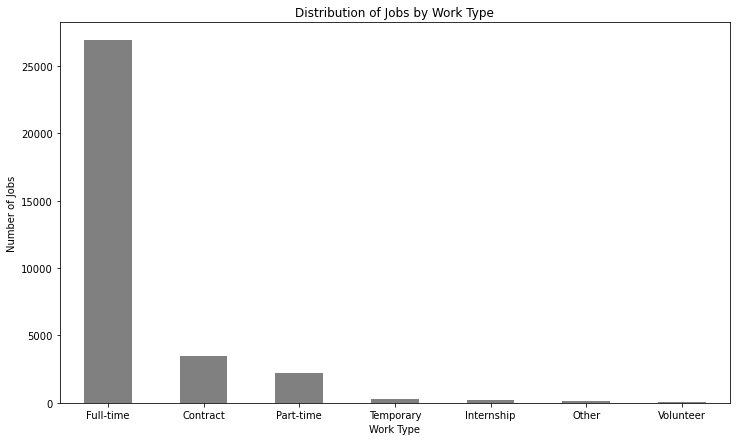

In [17]:
##Distribution of Jobs by Work Type
work_type_distribution = job_posting_df['formatted_work_type'].value_counts()
# Plot
plt.figure(figsize=(12, 7))
work_type_distribution.plot(kind='bar', color='grey')
plt.title('Distribution of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=360)
plt.show()

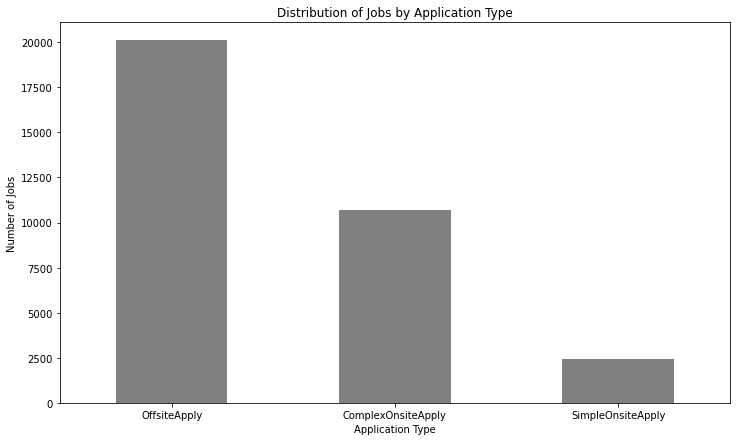

In [18]:
#Distribution of Jobs by Application Type
work_type_distribution = job_posting_df['application_type'].value_counts()
# Plot
plt.figure(figsize=(12, 7))
work_type_distribution.plot(kind='bar', color='grey')
plt.title('Distribution of Jobs by Application Type')
plt.xlabel('Application Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=360)
plt.show()

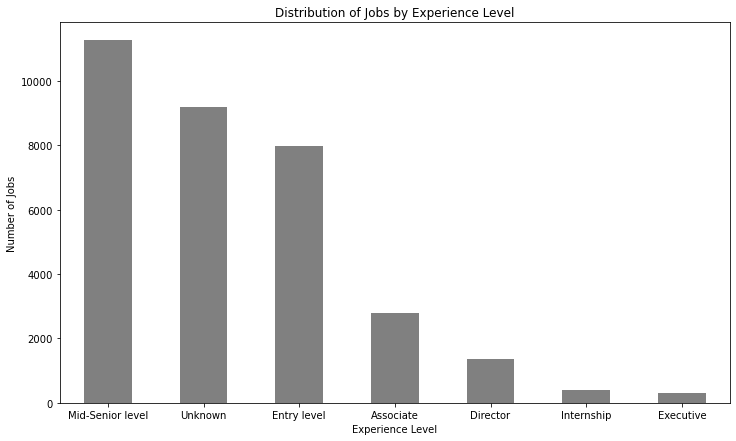

In [19]:
#Distribution of Jobs by Experience Level
work_type_distribution = job_posting_df['formatted_experience_level'].value_counts()
# Plot
plt.figure(figsize=(12, 7))
work_type_distribution.plot(kind='bar', color='grey')
plt.title('Distribution of Jobs by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=360)
plt.show()

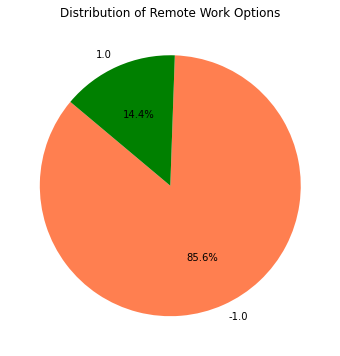

In [20]:
# Distribution of remote work options
remote_work_distribution = job_posting_df['remote_allowed'].value_counts()

# Plot
plt.figure(figsize=(9, 6))
remote_work_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['coral', 'green', 'blue'])
plt.title('Distribution of Remote Work Options')
plt.ylabel('')
plt.show()

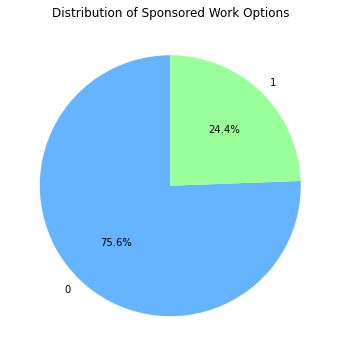

In [21]:
# Distribution of Sponsored Work Options
sponsored_work_distribution = job_posting_df['sponsored'].value_counts()

# Plot
plt.figure(figsize=(9, 6))
sponsored_work_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Sponsored Work Options')
plt.ylabel('')
plt.show()

In [22]:
!pip install wordcloud

In [23]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


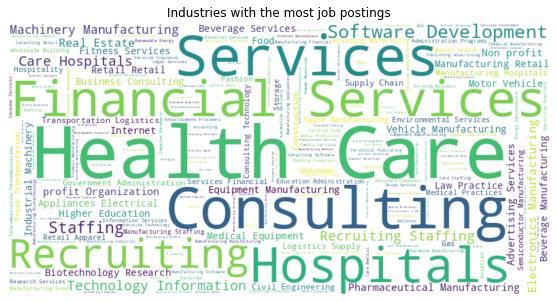

In [25]:
#Word Cloud describing the industry with most job openings
from wordcloud import WordCloud
# Combine all text in the 'TextColumn' into a single string
text = ' '.join(job_posting_df['industry_name'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Industries with the most job postings')
plt.axis('off')
plt.show()

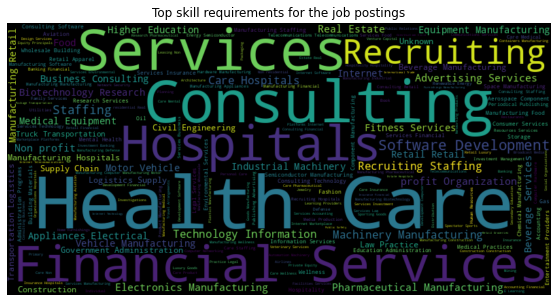

In [26]:
#text = ' '.join(job_posting_df['skill_name'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top skill requirements for the job postings')
plt.axis('off')
plt.show()